# MACHINE LEARNING - LAB3

### Reg no: 2248031

### Name: Arya Anil

## 1. Problem Statement

In this case, we want to have a study around one of the critical disease “Stroke”. Stroke is a disease that affects the arteries leading to and within the brain. A stroke occurs when a blood vessel that carries oxygen and nutrients to the brain is either blocked by a clot or bursts (or ruptures). When that happens, part of the brain cannot get the blood (and oxygen) it needs, so it and brain cells die.

Over the last few years, the Client has captured several health, demographic and lifestyle details about its patients. This includes details such as age and gender, along with several health parameters (e.g. hypertension, body mass index) and lifestyle related variables (e.g. smoking status, occupation type). The Client wants us to predict the probability of stroke happening to their patients. This will help doctors take proactive health measures for these patients.

## 2. Aim

Here, we are trying to predict the occurence of stroke based on the patient's medical profile and lifestyle like : age, gender, work type, average glucose level, bmi, smoking status, marriage status etc. In order to achieve this, we are using two models: parametric one(logistic regression) and non-parametric one(KNN). Our aim to build a model which will give us the maximum accuracy.

## 3. Importing required libraries.

In [1]:
import pandas as pd  
import numpy as np  
import seaborn as sns 
import matplotlib.pyplot as plt


from sklearn.metrics import accuracy_score,precision_score,recall_score, confusion_matrix,f1_score
from sklearn.preprocessing import MinMaxScaler 
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV 

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

import warnings 
warnings.filterwarnings('ignore')

## 4. Data Preprocessing

### 4.1 Loading the Data 

In [2]:
data = pd.read_csv("C:\\Users\\hp\\Downloads\\healthcare-dataset-stroke-data.csv")
print(f"Shape Of The Dataset : {data.shape}")
print(f"Dataset Information :\n")
print(data.info())

print(f"\nGlimpse Of The Dataset :")
data.head(10)

Shape Of The Dataset : (5110, 12)
Dataset Information :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None

Glimpse Of The Dataset :


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


### 4.2 Data Description

In [3]:
# NUMERICAL ATTRIBUTES:

print(f"\nDescription of Data (numerical data typed features only) :")
data.describe()


Description of Data (numerical data typed features only) :


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [3]:
# CATEGORICAL ATTRIBUTES

print(f"\nDescription of Data (categorical data typed features) :")
data.describe(include=object)


Description of Data (categorical data typed features) :


,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


### 4.3 Handling missing data.

In [4]:
#Imputing Missing/NA Values in dataset using Attribute Mean/Median

data['bmi'].fillna(np.round(data['bmi'].median(), 1), inplace = True) ##replaced NA values in BMI attr with Median

#Printing top 5 rows to check consistency of data

data.head(5)
print(f"After imputing Null values of the Dataset :")
data.isna().sum().to_frame()

After imputing Null values of the Dataset :


,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


### 4.4 Dropping Unnecessary columns. 

In [5]:
data.drop(["id"], axis=1, inplace=True)

### 4.5 Normalizing numerical Data. 

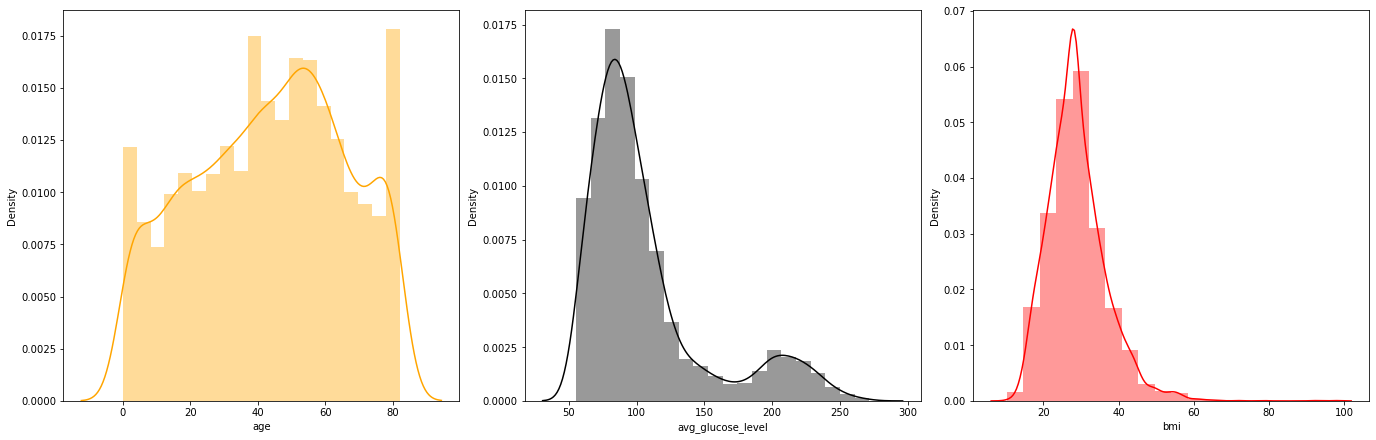

In [6]:
f,ax=plt.subplots(1,3,figsize=(19,6),constrained_layout = True, squeeze=False)
sns.distplot(data["age"],bins=20,ax=ax[0,0],color='orange');

sns.distplot(data["avg_glucose_level"],bins=20,ax=ax[0,1],color='black');

sns.distplot(data["bmi"],bins=20,ax=ax[0,2],color='red');

Since the distribution is not normal, we need to normalize the data.

In [7]:
transformer = MinMaxScaler()
def scaling(columns):
    return transformer.fit_transform(data[columns].values.reshape(-1,1))

columns_to_be_scaled = ['age','bmi','avg_glucose_level']
for i in columns_to_be_scaled:
    data[i] = scaling(i)
    
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,0.816895,0,1,Yes,Private,Urban,0.801265,0.301260,formerly smoked,1
1,Female,0.743652,0,0,Yes,Self-employed,Rural,0.679023,0.203895,never smoked,1
2,Male,0.975586,0,1,Yes,Private,Rural,0.234512,0.254296,never smoked,1
3,Female,0.597168,0,0,Yes,Private,Urban,0.536008,0.276060,smokes,1
4,Female,0.963379,1,0,Yes,Self-employed,Rural,0.549349,0.156930,never smoked,1


### 4.6 One Hot Encoding

Transforming categorical features into dummy variables as 0 and 1 to be able to use them in classification models.

In [8]:
dummy_df_gender = pd.get_dummies(data["gender"],dtype=np.int64,prefix="Gender_is",drop_first=True)
dummy_df_rt = pd.get_dummies(data["Residence_type"],dtype=np.int64,prefix="Residence_type_is",drop_first=True)
dummy_df_hd = pd.get_dummies(data["heart_disease"],dtype=np.int64,prefix="heart_disease_is",drop_first=True)
dummy_df_hyp = pd.get_dummies(data["hypertension"],dtype=np.int64,prefix="hypertension_is",drop_first=True)
dummy_df_married = pd.get_dummies(data["ever_married"],dtype=np.int64,prefix="ever_married_is",drop_first=True)
dummy_df_smoke = pd.get_dummies(data["smoking_status"],dtype=np.int64,prefix="smoking_status_is")
dummy_df_worktype = pd.get_dummies(data["work_type"],dtype=np.int64,prefix="work_type_is")

data = pd.concat([data,dummy_df_gender,dummy_df_rt,dummy_df_hd,dummy_df_hyp,
                dummy_df_married,dummy_df_smoke,dummy_df_worktype],axis=1)
data = data.loc[:,~data.columns.duplicated()]
data = data.drop(['gender','hypertension','heart_disease','ever_married','Residence_type','smoking_status','work_type'],axis=1)

data.head()

,age,avg_glucose_level,bmi,stroke,Gender_is_Male,Gender_is_Other,Residence_type_is_Urban,heart_disease_is_1,hypertension_is_1,ever_married_is_Yes,smoking_status_is_Unknown,smoking_status_is_formerly smoked,smoking_status_is_never smoked,smoking_status_is_smokes,work_type_is_Govt_job,work_type_is_Never_worked,work_type_is_Private,work_type_is_Self-employed,work_type_is_children
0,0.816895,0.801265,0.301260,1,1,0,1,1,0,1,0,1,0,0,0,0,1,0,0
1,0.743652,0.679023,0.203895,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
2,0.975586,0.234512,0.254296,1,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0
3,0.597168,0.536008,0.276060,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
4,0.963379,0.549349,0.156930,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0


## 5. Data Modelling

### 5.1 Splitting into train test 

In [9]:
X=data.drop(['stroke'],axis=1)
y=data['stroke']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=123)

### 5.2 Balancing the dataset using SMOTE

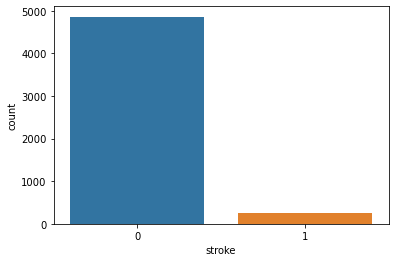

In [11]:
#BEFORE SMOTE:

sns.countplot(data = data, x='stroke');

In [10]:
sm = SMOTE(k_neighbors=5, random_state=123)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)
print('Before OverSampling, the shape of X_train: {}'.format(X_train.shape))
print('Before OverSampling, the shape of y_train: {}'.format(y_train.shape)) 
print('After OverSampling, the shape of X_train_over: {}'.format(X_train_over.shape))
print('After OverSampling, the shape of y_train_over: {}'.format(y_train_over.shape))

Before OverSampling, the shape of X_train: (3832, 18)
Before OverSampling, the shape of y_train: (3832,)
After OverSampling, the shape of X_train_over: (7282, 18)
After OverSampling, the shape of y_train_over: (7282,)


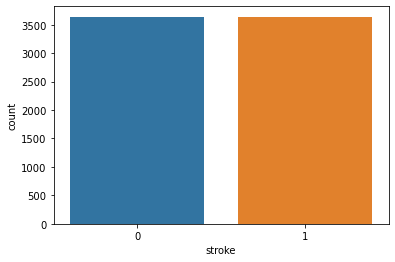

In [13]:
#AFTER SMOTE

y_train_over_df = y_train_over.to_frame()
sns.countplot(data=y_train_over_df, x='stroke');

### 5.3.1  Model 1 - Logistic Regression 

In [14]:
lr= LogisticRegression()
lr.fit(X_train_over,y_train_over) 
y_pred_lr = lr.predict(X_test) 

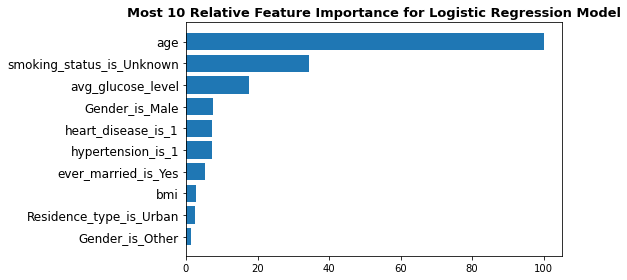

In [15]:
feature_importance = abs(lr.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())[0:10]
sorted_idx = np.argsort(feature_importance)[0:10]
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(8, 4))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
plt.title('Most 10 Relative Feature Importance for Logistic Regression Model', fontsize=13, fontweight='bold')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=12)

plt.tight_layout()
plt.show()

In [16]:
print("**************** LOGISTIC REGRESSION CLASSIFIER MODEL RESULTS **************** ")
print('Accuracy score for testing set: ',round(accuracy_score(y_test,y_pred_lr),5))
print('F1 score for testing set: ',round(f1_score(y_test,y_pred_lr,average='weighted'),5))
print('Recall score for testing set: ',round(recall_score(y_test,y_pred_lr,average='weighted'),5))
print('Precision score for testing set: ',round(precision_score(y_test,y_pred_lr,average='weighted'),5))
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)

**************** LOGISTIC REGRESSION CLASSIFIER MODEL RESULTS **************** 
Accuracy score for testing set:  0.75978
F1 score for testing set:  0.8284
Recall score for testing set:  0.75978
Precision score for testing set:  0.93459
[[938 282]
 [ 25  33]]


### 5.3.2 Model 2 - KNN Classifier

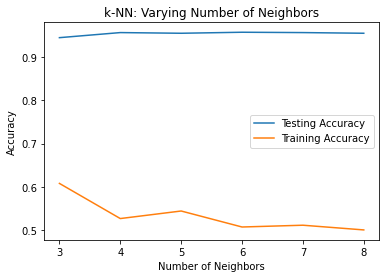

In [17]:
neighbors = np.arange(3, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_accuracy[i] = knn.score(X_train_over, y_train_over)
    test_accuracy[i] = knn.score(X_test, y_test)
    
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

From the figure, we need to choose K value which is not too high and have the highest accuracies for testing and training sets. 3 looks good from the figure below according to the accuracies. 

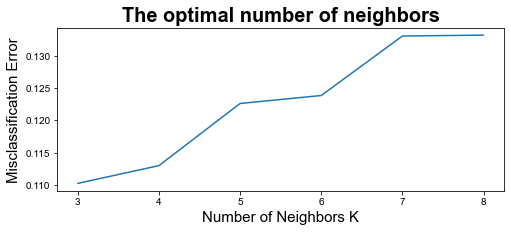

In [18]:
k_list = list(range(3,9,1))
cv_scores = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_over, y_train_over, cv=3, scoring='accuracy')
    cv_scores.append(scores.mean())
  
MSE = [1 - x for x in cv_scores]

plt.figure(figsize=(8,3))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE);

plt.show();

As we can see from the graph - as the K values increases the Error also increases. Again it shows that K = 3 is the optimal 
K value.

In [19]:
knn =KNeighborsClassifier(n_neighbors=3)
knn_model = knn.fit(X_train,y_train) 
y_pred_knn = knn.predict(X_test) 

In [20]:
print("**************** KNN MODEL RESULTS **************** ")
print('Accuracy score for testing set: ',round(accuracy_score(y_test,y_pred_knn),5))
print('F1 score for testing set: ',round(f1_score(y_test,y_pred_knn,average='weighted'),5))
print('Recall score for testing set: ',round(recall_score(y_test,y_pred_knn,average='weighted'),5))
print('Precision score for testing set: ',round(precision_score(y_test,y_pred_knn,average='weighted'),5))
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)

**************** KNN MODEL RESULTS **************** 
Accuracy score for testing set:  0.94444
F1 score for testing set:  0.93081
Recall score for testing set:  0.94444
Precision score for testing set:  0.92008
[[1204   16]
 [  55    3]]


### 5.4 F1 Score.

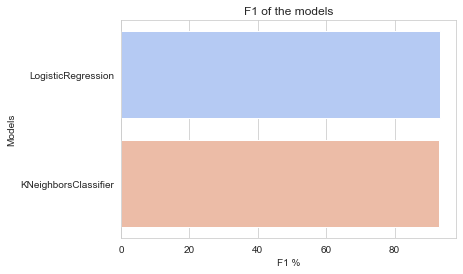

In [21]:
models = [lr,knn_model]

result = []
results = pd.DataFrame(columns= ["Models","F1"])

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    f1 = cross_val_score(model,X_test,y_test,cv=10,scoring="f1_weighted").mean()  
    result = pd.DataFrame([[names, f1*100]], columns= ["Models","F1"])
    results = results.append(result)
    
sns.barplot(x= 'F1', y = 'Models', data=results, palette="coolwarm")
plt.xlabel('F1 %')
plt.title('F1 of the models');


In [22]:
results.sort_values(by="F1",ascending=False)

,Models,F1
0,LogisticRegression,93.246803
0,KNeighborsClassifier,92.950772


LogisticRegression has performed the best for the given dataset (93.246803%)

KNeighborsClassifier has performed the second best for the given dataset (93.241040%)

## 6. Inference

We have used a parametric model(logistic regression) and non parametric model(KNN) to predict the occurence of stroke. From the F1 score we can conclude that Logistic Regression has performed the best. 